In [50]:
# Dependencies
import random
import json
from pprint import pprint
import requests
from citipy import citipy
from config import api_key
import pandas as pd
import matplotlib.pyplot as plt

# Generate Cities List

In [64]:
# Create coordinates list to populate with random coordinates
coordinates = []

# Generate random coordinates and append to coordinates list
for x in range(1500):
    coordinates.append((random.randint(-90, 91), random.randint(-180, 181)))

# print(coordinates)

In [67]:
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    city_obj = citipy.nearest_city(lat, lon)
    city = city_obj.city_name
    
    # Want unique cities
    if city not in cities:
        cities.append(city)

# print(cities)
print(f"Unique cities found based on lat/lon out of 1500 coordinate pairs: {len(cities)}")

Unique cities found based on lat/lon out of 1500 coordinate pairs: 593


# Perform API Calls

In [53]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [54]:
# Set up lists to hold reponse information
name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
for i, city in enumerate(cities):
    print(f"Processing Record {i + 1} | {city}")
    
    # Replace spaces in cities names of more than one word
    city_name = city.replace(" ", "+")
    
    # Print each query
    full_query_url = query_url + city_name
    print(full_query_url)
    
    # Retrieve data as json
    response = requests.get(full_query_url).json()
    
    # Append data to lists
    try:
        name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
    except KeyError:
        print(f"*City Not Found ({city})")
    except:
        raise
        
print(name)
print(f"Number of cities successfully queried out of {len(cities)}: {len(name)}")
print(f"Length of cities: {len(name)}")
print(f"Length of cloudiness: {len(cloudiness)}")
print(f"Length of country: {len(country)}")
print(f"Length of date: {len(date)}")
print(f"Length of humidity: {len(humidity)}")
print(f"Length of lat: {len(lat)}")
print(f"Length of lon: {len(lon)}")
print(f"Length of max_temp: {len(max_temp)}")
print(f"Length of wind_speed: {len(wind_speed)}")

Processing Record 1 | consett
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=consett
Processing Record 2 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=saskylakh
Processing Record 3 | hurghada
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=hurghada
*City Not Found (hurghada)
Processing Record 4 | taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=taolanaro
*City Not Found (taolanaro)
Processing Record 5 | hilo
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=hilo
Processing Record 6 | tumannyy
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=tumannyy
*City Not Found (tumannyy)
Processing Record 7 | punta arenas
http://api.openweathermap.org/d

Processing Record 57 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=comodoro+rivadavia
Processing Record 58 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=hobart
Processing Record 59 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=qaanaaq
Processing Record 60 | east london
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=east+london
Processing Record 61 | uvira
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=uvira
Processing Record 62 | yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=yellowknife
Processing Record 63 | kasempa
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95

Processing Record 113 | lompoc
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=lompoc
Processing Record 114 | ilhabela
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=ilhabela
Processing Record 115 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=mataura
Processing Record 116 | yertsevo
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=yertsevo
Processing Record 117 | sete
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=sete
Processing Record 118 | lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=lazaro+cardenas
Processing Record 119 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units

Processing Record 168 | tadine
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=tadine
Processing Record 169 | uberlandia
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=uberlandia
Processing Record 170 | zhigansk
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=zhigansk
Processing Record 171 | koltubanovskiy
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=koltubanovskiy
Processing Record 172 | kiama
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=kiama
Processing Record 173 | barentsburg
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=barentsburg
*City Not Found (barentsburg)
Processing Record 174 | sijunjung
http://api.openweathermap.org/data/2.5/weather?appid=b

Processing Record 223 | amderma
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=amderma
*City Not Found (amderma)
Processing Record 224 | gurupa
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=gurupa
*City Not Found (gurupa)
Processing Record 225 | grindavik
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=grindavik
Processing Record 226 | tocopilla
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=tocopilla
Processing Record 227 | palmer
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=palmer
Processing Record 228 | port-gentil
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=port-gentil
Processing Record 229 | pringsewu
http://api.openweathermap.org/data/2.5/weathe

Processing Record 279 | raga
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=raga
*City Not Found (raga)
Processing Record 280 | dong hoi
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=dong+hoi
Processing Record 281 | san francisco
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=san+francisco
Processing Record 282 | tilichiki
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=tilichiki
Processing Record 283 | yumen
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=yumen
Processing Record 284 | karaul
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=karaul
*City Not Found (karaul)
Processing Record 285 | skibbereen
http://api.openweathermap.org/data/2.5/weather?appid=

In [55]:
cities_data_df = pd.DataFrame({'City': name, 
                               'Cloudiness': cloudiness, 
                               'Country': country, 
                               'Date': date, 
                               'Humidity': humidity, 
                               'Lat': lat, 
                               'Lon': lon, 
                               'Max Temp': max_temp, 
                               'Wind Speed': wind_speed})

cities_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Consett,75,GB,1520281200,100,54.85,-1.83,41.00,8.05
1,Saskylakh,56,RU,1520282701,36,71.97,114.09,-23.86,5.61
2,Hilo,40,US,1520279760,61,19.71,-155.08,77.00,10.29
3,Punta Arenas,0,CL,1520280000,42,-53.16,-70.91,64.40,41.38
4,Thompson,90,CA,1520280000,52,55.74,-97.86,19.40,11.41
5,Bredasdorp,92,ZA,1520280000,78,-34.53,20.04,71.60,6.93
6,Mar del Plata,24,AR,1520282844,34,-46.43,-67.52,74.47,11.99
7,Rawson,0,AR,1520282844,27,-43.30,-65.11,73.84,9.64
8,Sao Filipe,0,CV,1520282845,94,14.90,-24.50,71.32,15.57
9,Busselton,32,AU,1520282706,90,-33.64,115.35,73.07,12.77


# Latitude vs. Temperature Plot

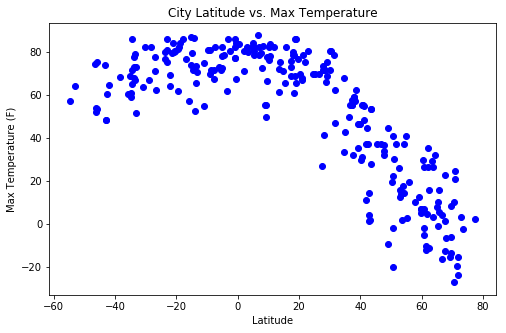

In [56]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create scatter plot
plt.scatter(cities_data_df['Lat'], cities_data_df['Max Temp'], marker='o', color='b')

# Label title and axes
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Latitude vs. Temperature Plot
plt.show()

# Latitude vs. Humidity Plot

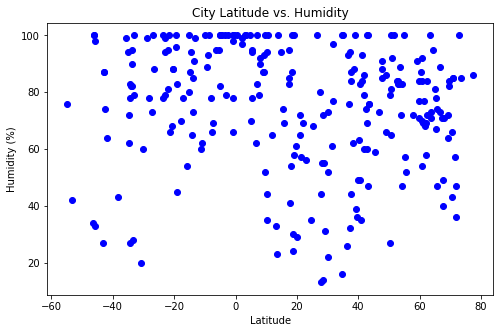

In [57]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create scatter plot
plt.scatter(cities_data_df['Lat'], cities_data_df['Humidity'], marker='o', color='b')

# Label title and axes
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Latitude vs. Humidity Plot
plt.show()

# Latitude vs. Cloudiness Plot

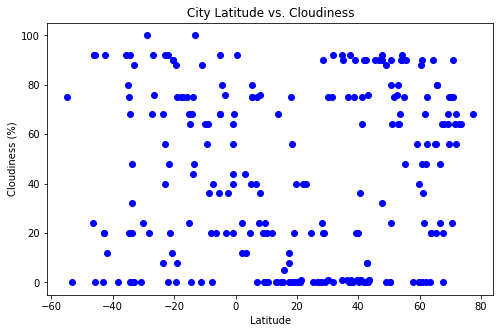

In [58]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create scatter plot
plt.scatter(cities_data_df['Lat'], cities_data_df['Cloudiness'], marker='o', color='b')

# Label title and axes
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Latitude vs. Cloudiness Plot
plt.show()

# Latitude vs. Wind Speed Plot

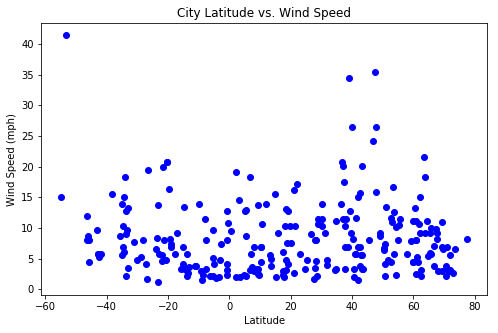

In [59]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create scatter plot
plt.scatter(cities_data_df['Lat'], cities_data_df['Wind Speed'], marker='o', color='b')

# Label title and axes
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Latitude vs. Wind Speed Plot
plt.show()